Calculando evolução do arrependimento (50 simulações)...


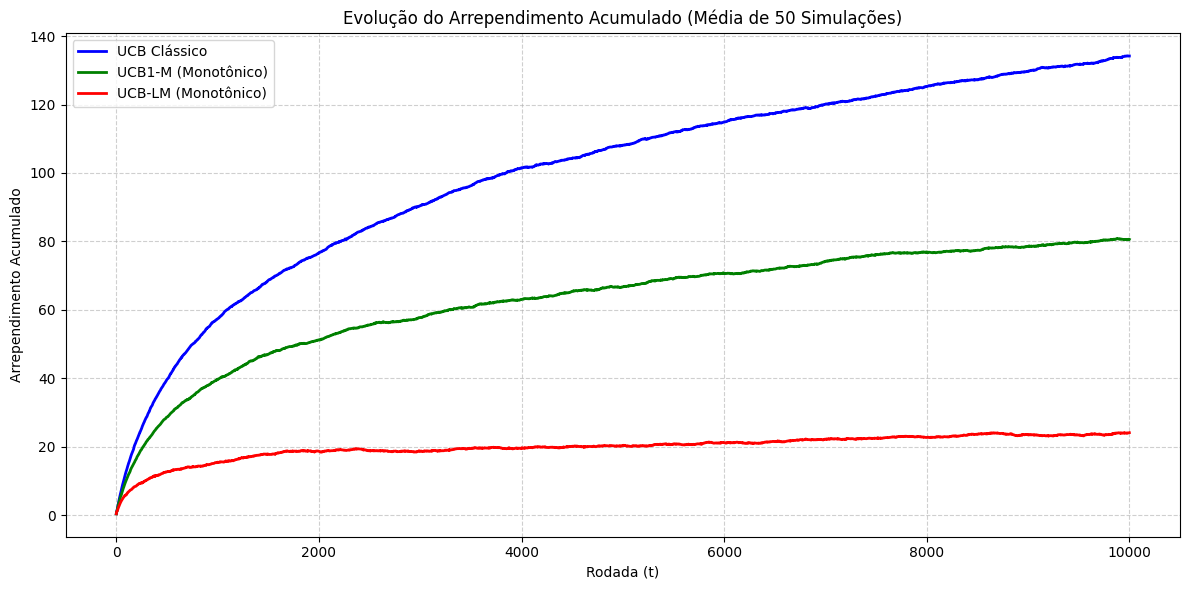

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# ====================================================================
# 1. FUNÇÕES MODIFICADAS PARA RETORNAR O HISTÓRICO DE ARREPENDIMENTO
# ====================================================================

def run_ucb_classic_history(K, N, reward_functions, expected_means):
    plays = np.zeros(K)
    rewards = np.zeros(K)
    regret_history = []
    total_obtained = 0
    max_mu = max(expected_means)

    for t in range(1, N + 1):
        if t <= K:
            arm = t - 1
        else:
            # Usando a mesma constante 1 que você ajustou
            ucb_values = (rewards / plays) + np.sqrt((1 * math.log(t)) / plays)
            arm = np.argmax(ucb_values)

        reward = reward_functions[arm]()
        plays[arm] += 1
        rewards[arm] += reward
        total_obtained += reward

        # Arrependimento acumulado até o tempo t
        current_regret = (t * max_mu) - total_obtained
        regret_history.append(current_regret)

    return np.array(regret_history)

def run_ucb1_m_history(K, N, reward_functions, expected_means):
    plays = np.zeros(K)
    rewards = np.zeros(K)
    regret_history = []
    total_obtained = 0
    max_mu = max(expected_means)

    for t in range(1, N + 1):
        if t <= K:
            arm = t - 1
        else:
            ucb_values = np.zeros(K)
            for i in range(K):
                candidates = []
                for j in range(i + 1):
                    avg_j = rewards[j] / plays[j]
                    # Ajustado para constante 1ln como no seu teste
                    explor = math.sqrt((1 * math.log(t) + math.log(i+1)) / (2 * plays[j]))
                    candidates.append(avg_j + explor)
                ucb_values[i] = min(candidates)
            arm = np.argmax(ucb_values)

        reward = reward_functions[arm]()
        plays[arm] += 1
        rewards[arm] += reward
        total_obtained += reward
        regret_history.append((t * max_mu) - total_obtained)

    return np.array(regret_history)

def run_ucb_lm_history(K, N, reward_functions, expected_means, mu_max=0.7):
    plays = np.zeros(K)
    rewards = np.zeros(K)
    regret_history = []
    total_obtained = 0
    max_mu = max(expected_means)

    for t in range(1, N + 1):
        if t <= K:
            arm = t - 1
        else:
            ucb_values = np.zeros(K)
            for i in range(K):
                candidates = []
                for j in range(i + 1):
                    avg_j = rewards[j] / plays[j]
                    # Ajustado para constante 1ln como no seu teste
                    #numerator = 2 * mu_max * (1 * math.log(t) + math.log(i + 1))
                    #explor = math.sqrt(numerator / plays[j])
                    #numerator = mu_max * (0.2 * math.log(t) + 0.1 * math.log(i + 1))
                    #xplor = math.sqrt(numerator / plays[j])
                    # Trocando a lógica conservadora por uma agressiva:
                    # Reduzimos o multiplicador de 2 para 1 e o log(t) para 0.1
                    numerator = 1 * mu_max * (0.1 * math.log(t) + 1 * math.log(i + 1))
                    explor = math.sqrt(numerator / plays[j])
                    candidates.append(avg_j + explor)
                ucb_values[i] = min(candidates)
            arm = np.argmax(ucb_values)

        reward = reward_functions[arm]()
        plays[arm] += 1
        rewards[arm] += reward
        total_obtained += reward
        regret_history.append((t * max_mu) - total_obtained)

    return np.array(regret_history)

# ====================================================================
# 2. CONFIGURAÇÃO E EXECUÇÃO
# ====================================================================

NUM_ARMS = 5
NUM_ROUNDS = 10000
NUM_SIMULATIONS = 50
EXPECTED_MEANS = [0.3, 0.4, 0.5, 0.6, 0.7]

REWARD_FUNCTIONS = [lambda m=mu: np.random.beta(m*10, (1-m)*10) for mu in EXPECTED_MEANS]

# Acumuladores para as médias das simulações
all_classic = np.zeros((NUM_SIMULATIONS, NUM_ROUNDS))
all_ucb1m = np.zeros((NUM_SIMULATIONS, NUM_ROUNDS))
all_ucblm = np.zeros((NUM_SIMULATIONS, NUM_ROUNDS))

print(f"Calculando evolução do arrependimento ({NUM_SIMULATIONS} simulações)...")

for s in range(NUM_SIMULATIONS):
    all_classic[s] = run_ucb_classic_history(NUM_ARMS, NUM_ROUNDS, REWARD_FUNCTIONS, EXPECTED_MEANS)
    all_ucb1m[s] = run_ucb1_m_history(NUM_ARMS, NUM_ROUNDS, REWARD_FUNCTIONS, EXPECTED_MEANS)
    all_ucblm[s] = run_ucb_lm_history(NUM_ARMS, NUM_ROUNDS, REWARD_FUNCTIONS, EXPECTED_MEANS)

# Média das simulações
mean_classic = np.mean(all_classic, axis=0)
mean_ucb1m = np.mean(all_ucb1m, axis=0)
mean_ucblm = np.mean(all_ucblm, axis=0)

# ====================================================================
# 3. PLOTAGEM DO GRÁFICO DE LINHAS
# ====================================================================



plt.figure(figsize=(12, 6))
plt.plot(mean_classic, label='UCB Clássico', color='blue', linewidth=2)
plt.plot(mean_ucb1m, label='UCB1-M (Monotônico)', color='green', linewidth=2)
plt.plot(mean_ucblm, label='UCB-LM (Monotônico)', color='red', linewidth=2)

plt.title('Evolução do Arrependimento Acumulado (Média de 50 Simulações)')
plt.xlabel('Rodada (t)')
plt.ylabel('Arrependimento Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()